In [1]:
#Importing Libraries

#import sys
#!{sys.executable} -m pip install pandas
import pandas as pd
from datetime import datetime
#import sys
#!{sys.executable} -m pip install matplotlib 
import matplotlib.pyplot as plt
#import sys
#!{sys.executable} -m pip install yahoofinancials
from yahoofinancials import YahooFinancials
#import sys
#!{sys.executable} -m pip install xlrd
import xlrd as xls
#import sys
#!{sys.executable} -m pip install openpyxl
import openpyxl as oplx
#import sys
#!{sys.executable} -m pip install seaborn
import seaborn as sns
#import sys
#!{sys.executable} -m pip install numpy
import numpy as np
#import sys
#!{sys.executable} -m pip install statsmodels
import statsmodels as sm

In [2]:
ticker_details = pd.read_excel("Ticker Lists.xlsx")
ticker_details.head(20)

,Ticker,Description
0,GC=F,Gold
1,SI=F,Silver
2,CL=F,Crude Oil
3,^GSPC,S&P500
4,^RUT,Russel 2000 Index
5,ZN=F,10 Yr US T-Note futures
6,ZT=F,2 Yr US T-Note Futures
7,PL=F,Platinum
8,HG=F,Copper
9,DX=F,Dollar Index


In [3]:
ticker = ticker_details['Ticker'].to_list()
names = ticker_details['Description'].to_list()

In [4]:
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key
end_date= "2020-12-31"
start_date = "2010-01-01"
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [5]:
#Extracting Data from Yahoo Finance and Adding them to Values table using date as key
for i in ticker:
    raw_data = YahooFinancials(i)
    raw_data = raw_data.get_historical_price_data(start_date, end_date, "daily")
    #try:
    df = pd.DataFrame(type(raw_data).__getitem__(raw_data, i)['prices'])[['formatted_date','adjclose']]
    #print(i+' Working')
    #except TypeError:
    #print(i+'not working')
    df.columns = ['Date1',i]
    df['Date1']= pd.to_datetime(df['Date1'])
    values = values.merge(df,how='left',left_on='Date',right_on='Date1')
    values = values.drop(labels='Date1',axis=1)

In [6]:
#Renaming columns to represent instrument names rather than their ticker codes for ease of readability
names.insert(0,'Date')
values.columns = names
print(values.shape)
print(values.isna().sum())
values.tail()

(2870, 17)
Date                         0
Gold                       126
Silver                     126
Crude Oil                  125
S&P500                     102
Russel 2000 Index          102
10 Yr US T-Note futures    127
2 Yr US T-Note Futures     125
Platinum                   132
Copper                     126
Dollar Index               127
Volatility Index           102
MSCI EM ETF                102
Euro USD                   357
Euronext100                 61
Nasdaq                     102
Treasury Yield 10 Years    126
dtype: int64


,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq,Treasury Yield 10 Years
2865,2020-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.218472,NaN,NaN,NaN
2866,2020-12-28,1877.199951,26.459999,47.619999,3735.360107,1996.250000,137.921875,110.476562,1042.199951,3.570,90.275002,21.700001,50.270000,1.220510,1107.849976,12899.419922,0.933
2867,2020-12-29,1879.699951,26.138000,48.000000,3727.040039,1959.359985,137.921875,110.476562,1055.699951,3.553,89.917999,23.080000,51.020000,1.222345,1113.819946,12850.219727,0.935
2868,2020-12-30,1891.000000,26.488001,48.400002,3732.040039,1979.989990,137.968750,110.476562,1072.599976,3.543,89.649002,22.770000,51.700001,1.225295,1112.439941,12870.000000,0.926
2869,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.229990,NaN,NaN,NaN


In [7]:
#Front filling the NaN values in the data set
values = values.fillna(method="ffill",axis=0)
values = values.fillna(method="bfill",axis=0)
values.isna().sum()

Date                       0
Gold                       0
Silver                     0
Crude Oil                  0
S&P500                     0
Russel 2000 Index          0
10 Yr US T-Note futures    0
2 Yr US T-Note Futures     0
Platinum                   0
Copper                     0
Dollar Index               0
Volatility Index           0
MSCI EM ETF                0
Euro USD                   0
Euronext100                0
Nasdaq                     0
Treasury Yield 10 Years    0
dtype: int64

In [8]:
# Co-ercing numeric type to all columns except Date
cols=values.columns.drop('Date')
values[cols] = values[cols].apply(pd.to_numeric,errors='coerce').round(decimals=1)
values.tail()

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq,Treasury Yield 10 Years
2865,2020-12-25,1874.7,25.8,48.1,3703.1,2003.9,137.8,110.5,1016.2,3.6,90.3,21.5,50.1,1.2,1100.2,12804.7,1.0
2866,2020-12-28,1877.2,26.5,47.6,3735.4,1996.2,137.9,110.5,1042.2,3.6,90.3,21.7,50.3,1.2,1107.8,12899.4,0.9
2867,2020-12-29,1879.7,26.1,48.0,3727.0,1959.4,137.9,110.5,1055.7,3.6,89.9,23.1,51.0,1.2,1113.8,12850.2,0.9
2868,2020-12-30,1891.0,26.5,48.4,3732.0,1980.0,138.0,110.5,1072.6,3.5,89.6,22.8,51.7,1.2,1112.4,12870.0,0.9
2869,2020-12-31,1891.0,26.5,48.4,3732.0,1980.0,138.0,110.5,1072.6,3.5,89.6,22.8,51.7,1.2,1112.4,12870.0,0.9


In [9]:
values.to_csv("Training Data_Values.csv")

In [10]:
imp = ['Gold','Silver', 'Crude Oil', 'S&P500','MSCI EM ETF']

In [11]:
# Calculating Short term Historical Returns
change_days = [1,3,5,14,21]

data = pd.DataFrame(data=values['Date'])
for i in change_days:
    print(data.shape)
    x= values[cols].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)
    x=[]
print(data.shape)

(2870, 1)
(2870, 17)
(2870, 33)
(2870, 49)
(2870, 65)
(2870, 81)


In [12]:
# Calculating Long term Historical Returns
change_days = [60,90,180,250]

for i in change_days:
    print(data.shape)
    x= values[imp].pct_change(periods=i).add_suffix("-T-"+str(i))
    data=pd.concat(objs=(data,x),axis=1)
    x=[]
print(data.shape)

(2870, 81)
(2870, 86)
(2870, 91)
(2870, 96)
(2870, 101)


In [13]:
#Calculating Moving averages for Gold
moving_avg = pd.DataFrame(values['Date'],columns=['Date'])
#print(moving_avg.shape)(2870, 1)
moving_avg['Date']=pd.to_datetime(moving_avg['Date'],format='%Y-%b-%d')
#print(moving_avg.shape)(2870, 1)
moving_avg['Gold/15SMA'] = (values['Gold']/(values['Gold'].rolling(window=15).mean()))-1
#print(moving_avg.shape)(2870, 2)
moving_avg['Gold/30SMA'] = (values['Gold']/(values['Gold'].rolling(window=30).mean()))-1
#print(moving_avg.shape)(2870, 3)
moving_avg['Gold/60SMA'] = (values['Gold']/(values['Gold'].rolling(window=60).mean()))-1
#print(moving_avg.shape)(2870, 4)
moving_avg['Gold/90SMA'] = (values['Gold']/(values['Gold'].rolling(window=90).mean()))-1
#print(moving_avg.shape)(2870, 5)
moving_avg['Gold/180SMA'] = (values['Gold']/(values['Gold'].rolling(window=180).mean()))-1
#print(moving_avg.shape)(2870, 6)
moving_avg['Gold/90EMA'] = (values['Gold']/(values['Gold'].ewm(span=90,adjust=True,ignore_na=True).mean()))-1
#moving_avg.tail(100)
moving_avg['Gold/180EMA'] = (values['Gold']/(values['Gold'].ewm(span=180,adjust=True,ignore_na=True).mean()))-1
#print(moving_avg)
moving_avg = moving_avg.dropna(axis=0)
print(moving_avg)
moving_avg.head()

           Date  Gold/15SMA  Gold/30SMA  Gold/60SMA  Gold/90SMA  Gold/180SMA  \
179  2010-09-09    0.005005    0.020246    0.026862    0.026428     0.067496   
180  2010-09-10    0.000536    0.014916    0.023422    0.022489     0.063095   
181  2010-09-13    0.000043    0.013705    0.023840    0.022565     0.062965   
182  2010-09-14    0.017736    0.031368    0.043642    0.042295     0.083187   
183  2010-09-15    0.013857    0.026901    0.040711    0.039604     0.079958   
...         ...         ...         ...         ...         ...          ...   
2865 2020-12-25    0.007163    0.014313    0.000900   -0.007939     0.016912   
2866 2020-12-28    0.007950    0.015850    0.002549   -0.006321     0.017729   
2867 2020-12-29    0.008971    0.017291    0.004076   -0.004810     0.018467   
2868 2020-12-30    0.012992    0.023084    0.010045    0.001466     0.024089   
2869 2020-12-31    0.010920    0.022532    0.010024    0.001646     0.023603   

      Gold/90EMA  Gold/180EMA  
179    

,Date,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/90EMA,Gold/180EMA
179,2010-09-09,0.005005,0.020246,0.026862,0.026428,0.067496,0.032506,0.046162
180,2010-09-10,0.000536,0.014916,0.023422,0.022489,0.063095,0.028204,0.041912
181,2010-09-13,0.000043,0.013705,0.023840,0.022565,0.062965,0.028040,0.041852
182,2010-09-14,0.017736,0.031368,0.043642,0.042295,0.083187,0.047219,0.061593
183,2010-09-15,0.013857,0.026901,0.040711,0.039604,0.079958,0.043701,0.058291


In [14]:
#Merging Moving Average values to the feature space
print(data.shape)
data['Date']=pd.to_datetime(data['Date'],format='%Y-%b-%d')
data = pd.merge(left=data,right=moving_avg,how='left',on='Date')
print(data.shape)
data.isna().sum()

(2870, 101)
(2870, 108)


Date               0
Gold-T-1           1
Silver-T-1         1
Crude Oil-T-1      1
S&P500-T-1         1
                ... 
Gold/60SMA       179
Gold/90SMA       179
Gold/180SMA      179
Gold/90EMA       179
Gold/180EMA      179
Length: 108, dtype: int64

In [15]:
#Caluculating forward returns for Target
y = pd.DataFrame(data=values['Date'])
print(y.shape)
y['Gold-T+14']=values["Gold"].pct_change(periods=-14)
y['Gold-T+22']=values["Gold"].pct_change(periods=-22)
print(y.shape)
y.isna().sum()

(2870, 1)
(2870, 3)


Date          0
Gold-T+14    14
Gold-T+22    22
dtype: int64

In [16]:
# Removing NAs
print(data.shape)
data = data[data['Gold-T-250'].notna()]
y = y[y['Gold-T+22'].notna()]
print(data.shape)
print(y.shape)


(2870, 108)
(2620, 108)
(2848, 3)


In [17]:
#Adding Target Variables
data = pd.merge(left=data,right=y,how='inner',on='Date',suffixes=(False,False))
print(data.shape)
data.isna().sum()

(2598, 110)


Date             0
Gold-T-1         0
Silver-T-1       0
Crude Oil-T-1    0
S&P500-T-1       0
                ..
Gold/180SMA      0
Gold/90EMA       0
Gold/180EMA      0
Gold-T+14        0
Gold-T+22        0
Length: 110, dtype: int64

In [18]:
data.to_csv("Training Data.csv",index=False)

In [19]:
corr = data.corr().iloc[:,-2:].drop(labels=['Gold-T+14','Gold-T+22'],axis=0)

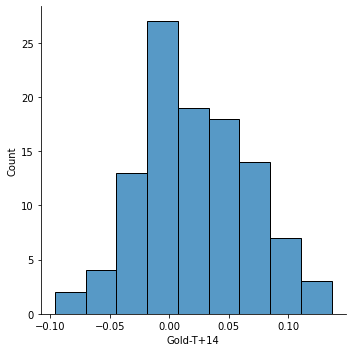

In [20]:
sns.displot(corr.iloc[:,0])

<AxesSubplot:xlabel='Gold-T+14', ylabel='Count'>

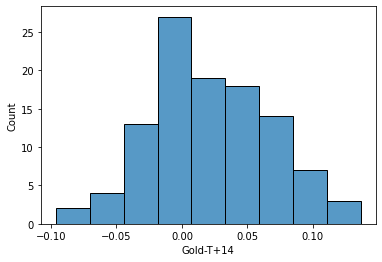

In [21]:
sns.histplot(corr.iloc[:,0])

In [22]:
pd.set_option('display.max_rows', None)
corr_data = data.tail(2000).corr()
corr_data = pd.DataFrame(corr_data['Gold-T+14'])
#corr_data = corr_data.iloc[3:,]
corr_data = corr_data.sort_values('Gold-T+14',ascending=False)
#corr_data

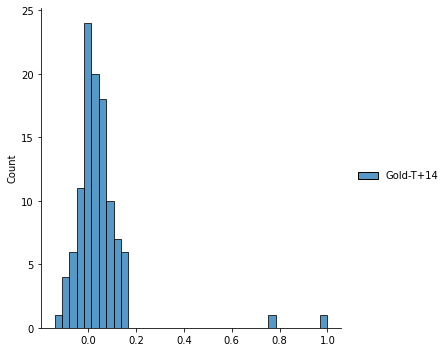

In [23]:
sns.displot(corr_data)

<AxesSubplot:ylabel='Count'>

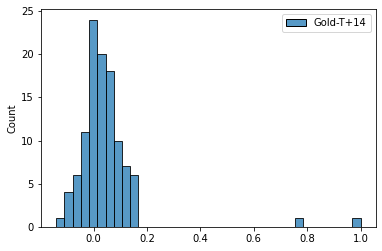

In [24]:
sns.histplot(corr_data)

In [25]:
print(values.shape)

(2870, 17)


In [26]:
price_data = pd.read_csv('Training Data_Values.csv')
gold_data = price_data.describe()
factor_data = gold_data.drop(['Unnamed: 0'], axis = 1) 
factor_data.head(10)

,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq,Treasury Yield 10 Years
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000
mean,1385.447073,21.057840,69.471882,2076.966167,1170.359408,127.321847,109.011986,1216.445889,3.042753,89.007909,17.968780,36.632509,1.221603,857.229024,5240.799617,2.258711
std,214.366128,6.872244,23.189342,674.850614,325.800910,5.366263,1.404627,331.402235,0.559379,8.236112,7.407778,4.532274,0.116413,161.565980,2423.746841,0.691682
min,1050.800000,11.700000,-37.600000,1022.600000,586.500000,115.000000,105.200000,595.900000,1.900000,73.100000,9.100000,25.400000,1.000000,529.500000,2091.800000,0.500000
25%,1230.075000,16.300000,49.600000,1413.125000,837.850000,124.100000,108.300000,924.500000,2.600000,80.600000,13.200000,33.500000,1.100000,704.225000,3050.450000,1.800000
50%,1309.850000,18.000000,65.500000,2051.200000,1167.800000,126.700000,109.600000,1104.200000,3.000000,92.150000,15.900000,36.100000,1.200000,862.800000,4805.550000,2.300000
75%,1543.075000,24.375000,92.400000,2656.750000,1467.825000,130.900000,110.100000,1519.100000,3.400000,96.500000,20.400000,39.500000,1.300000,998.150000,7077.550000,2.700000
max,2051.500000,48.600000,113.900000,3735.400000,2007.100000,140.300000,110.500000,1905.700000,4.600000,103.600000,82.700000,51.700000,1.500000,1182.100000,12899.400000,4.000000


In [27]:
values.head()

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq,Treasury Yield 10 Years
0,2010-01-01,1117.7,17.4,81.5,1133.0,640.1,115.5,108.3,1517.3,3.4,77.8,20.0,34.1,1.4,697.0,2308.4,3.8
1,2010-01-04,1117.7,17.4,81.5,1133.0,640.1,115.5,108.3,1517.3,3.4,77.8,20.0,34.1,1.4,697.0,2308.4,3.8
2,2010-01-05,1118.1,17.8,81.8,1136.5,638.5,116.2,108.4,1530.8,3.4,77.8,19.4,34.4,1.4,697.6,2308.7,3.8
3,2010-01-06,1135.9,18.2,83.2,1137.1,638.0,116.0,108.4,1552.2,3.5,77.7,19.2,34.4,1.4,698.3,2301.1,3.8
4,2010-01-07,1133.1,18.3,82.7,1141.7,642.0,115.8,108.4,1553.0,3.4,78.1,19.1,34.2,1.4,697.8,2300.1,3.8


In [28]:
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gold                     8 non-null      float64
 1   Silver                   8 non-null      float64
 2   Crude Oil                8 non-null      float64
 3   S&P500                   8 non-null      float64
 4   Russel 2000 Index        8 non-null      float64
 5   10 Yr US T-Note futures  8 non-null      float64
 6   2 Yr US T-Note Futures   8 non-null      float64
 7   Platinum                 8 non-null      float64
 8   Copper                   8 non-null      float64
 9   Dollar Index             8 non-null      float64
 10  Volatility Index         8 non-null      float64
 11  MSCI EM ETF              8 non-null      float64
 12  Euro USD                 8 non-null      float64
 13  Euronext100              8 non-null      float64
 14  Nasdaq                   8 no

In [29]:
sns.set_theme(style="darkgrid", color_codes=True)

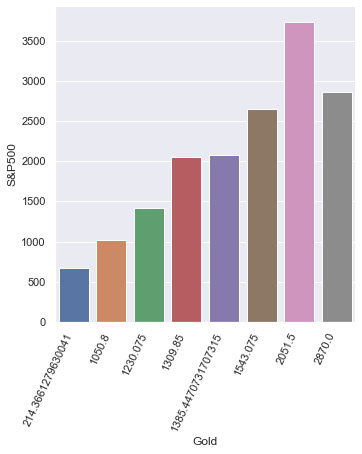

In [30]:
ax = sns.catplot(x='Gold',y='S&P500',kind="bar",data=factor_data)
for axes in ax.axes.flat:          
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')

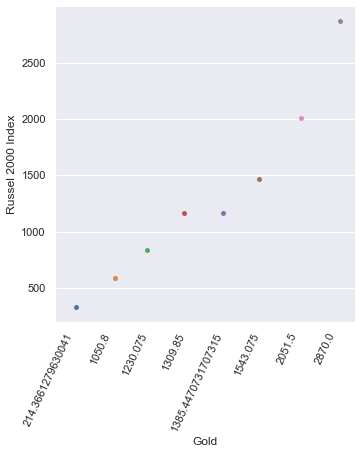

In [31]:
bx = sns.catplot(x="Gold",y="Russel 2000 Index",data=factor_data)
for axes in bx.axes.flat:          
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')

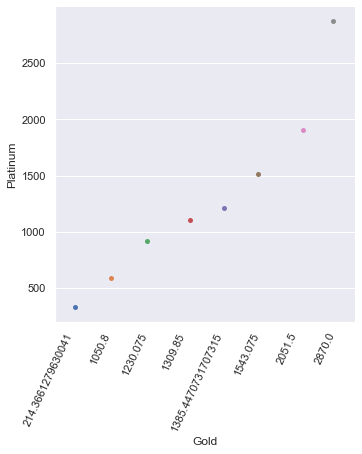

In [32]:
cx = sns.catplot(x="Gold", y="Platinum",data=factor_data)
for axes in cx.axes.flat:          
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')

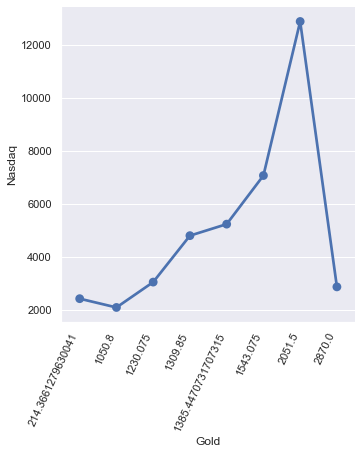

In [33]:
dx = sns.catplot(x="Gold", y="Nasdaq",kind="point",data=factor_data)
for axes in dx.axes.flat:          
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')

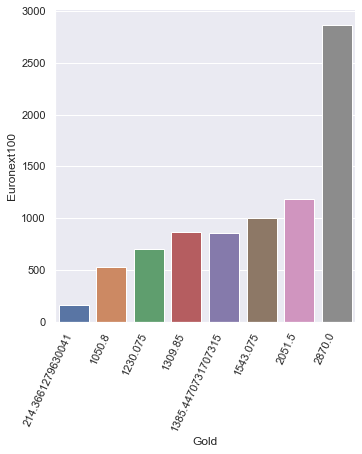

In [34]:
ex = sns.catplot(x="Gold", y="Euronext100", kind="bar", data=factor_data)
for axes in ex.axes.flat:          
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')

<AxesSubplot:xlabel='Gold', ylabel='Nasdaq'>

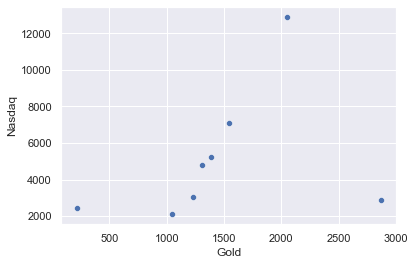

In [35]:
sns.scatterplot(x='Gold',y='Nasdaq',data=factor_data)

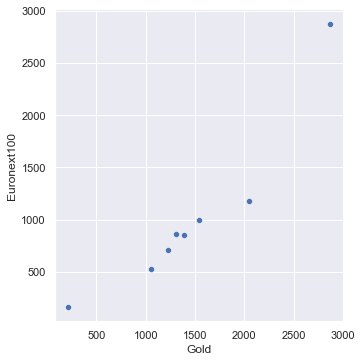

In [36]:
sns.relplot(x="Gold", y="Euronext100", data=factor_data)

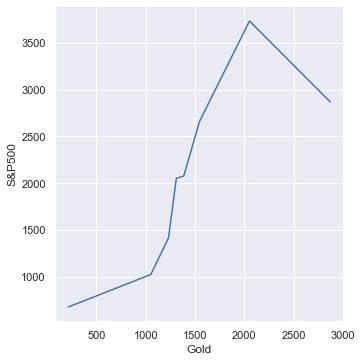

In [37]:
sns.relplot(x="Gold", y="S&P500", kind="line", data=factor_data)

<AxesSubplot:xlabel='Gold', ylabel='Density'>

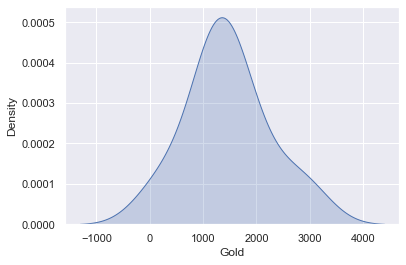

In [38]:
sns.kdeplot(factor_data['Gold'],shade=True)

<AxesSubplot:xlabel='Gold', ylabel='S&P500'>

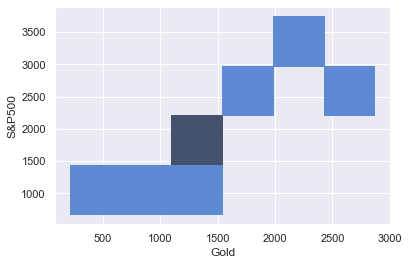

In [39]:
sns.histplot(x='Gold',y='S&P500',data=factor_data)

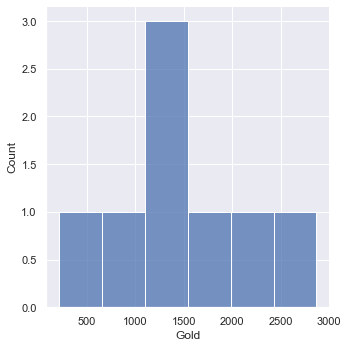

In [40]:
sns.displot(factor_data['Gold'])

<AxesSubplot:xlabel='Gold', ylabel='Proportion'>

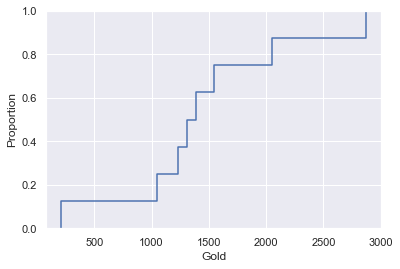

In [41]:
sns.ecdfplot(factor_data['Gold'])

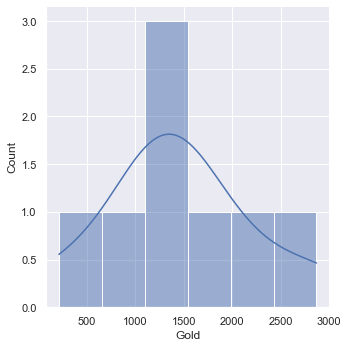

In [42]:
sns.displot(data=factor_data, x="Gold", kde=True)

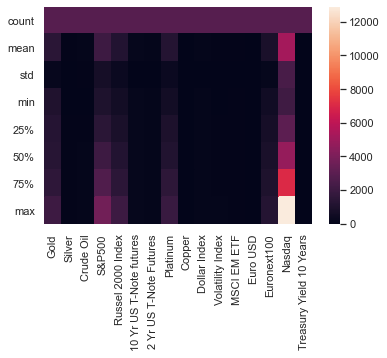

In [43]:
heat_map = sns.heatmap(factor_data)

In [44]:
values.head()

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq,Treasury Yield 10 Years
0,2010-01-01,1117.7,17.4,81.5,1133.0,640.1,115.5,108.3,1517.3,3.4,77.8,20.0,34.1,1.4,697.0,2308.4,3.8
1,2010-01-04,1117.7,17.4,81.5,1133.0,640.1,115.5,108.3,1517.3,3.4,77.8,20.0,34.1,1.4,697.0,2308.4,3.8
2,2010-01-05,1118.1,17.8,81.8,1136.5,638.5,116.2,108.4,1530.8,3.4,77.8,19.4,34.4,1.4,697.6,2308.7,3.8
3,2010-01-06,1135.9,18.2,83.2,1137.1,638.0,116.0,108.4,1552.2,3.5,77.7,19.2,34.4,1.4,698.3,2301.1,3.8
4,2010-01-07,1133.1,18.3,82.7,1141.7,642.0,115.8,108.4,1553.0,3.4,78.1,19.1,34.2,1.4,697.8,2300.1,3.8


In [45]:
Gold = values['Gold'].tolist()
print(Gold)   

[1117.7, 1117.7, 1118.1, 1135.9, 1133.1, 1138.2, 1150.7, 1128.9, 1136.4, 1142.6, 1130.1, 1130.1, 1139.7, 1112.3, 1102.7, 1089.2, 1095.2, 1097.9, 1084.4, 1083.6, 1083.0, 1104.3, 1117.4, 1111.4, 1062.4, 1052.2, 1065.7, 1076.7, 1075.8, 1094.2, 1089.5, 1089.5, 1119.3, 1119.5, 1118.0, 1121.3, 1112.6, 1102.7, 1096.5, 1107.8, 1118.3, 1117.8, 1136.9, 1142.7, 1132.6, 1134.8, 1123.6, 1122.0, 1107.8, 1108.0, 1101.5, 1105.1, 1122.2, 1124.0, 1127.4, 1107.4, 1099.3, 1103.5, 1088.6, 1092.7, 1104.2, 1110.3, 1104.5, 1113.3, 1125.1, 1125.1, 1132.9, 1135.1, 1152.3, 1152.2, 1161.1, 1161.6, 1152.8, 1159.0, 1159.7, 1136.3, 1135.2, 1138.6, 1148.2, 1142.3, 1153.1, 1153.5, 1161.7, 1171.3, 1168.4, 1180.1, 1182.7, 1168.6, 1174.6, 1196.9, 1210.0, 1200.4, 1219.9, 1242.7, 1228.8, 1227.4, 1227.7, 1214.3, 1192.6, 1187.8, 1175.7, 1193.8, 1197.8, 1213.3, 1211.9, 1212.2, 1212.2, 1224.8, 1220.6, 1208.3, 1216.2, 1239.3, 1244.0, 1228.5, 1220.8, 1228.9, 1223.3, 1233.2, 1229.3, 1247.5, 1257.2, 1239.7, 1239.9, 1234.1, 1245.5,

In [46]:
Silver = values['Silver'].tolist()
print(Silver)   

[17.4, 17.4, 17.8, 18.2, 18.3, 18.5, 18.7, 18.2, 18.5, 18.6, 18.4, 18.4, 18.8, 17.9, 17.5, 16.9, 17.1, 16.8, 16.4, 16.2, 16.2, 16.7, 16.7, 16.3, 15.3, 14.8, 15.1, 15.4, 15.3, 15.6, 15.4, 15.4, 16.1, 16.1, 16.1, 16.4, 16.2, 15.9, 15.9, 16.1, 16.5, 16.4, 17.0, 17.3, 17.2, 17.4, 17.3, 17.3, 17.0, 17.1, 17.0, 17.1, 17.3, 17.5, 17.4, 17.0, 16.9, 17.0, 16.6, 16.7, 16.9, 17.4, 17.3, 17.5, 17.9, 17.9, 18.1, 17.9, 18.2, 18.1, 18.3, 18.4, 18.2, 18.4, 18.4, 17.7, 17.7, 17.8, 18.1, 18.0, 18.2, 18.3, 18.1, 18.1, 18.5, 18.6, 18.8, 17.8, 17.5, 17.5, 18.4, 18.5, 19.3, 19.6, 19.5, 19.2, 18.8, 18.9, 18.1, 17.7, 17.6, 18.0, 17.8, 18.3, 18.5, 18.4, 18.4, 18.5, 18.3, 17.9, 17.3, 18.2, 18.5, 18.2, 18.3, 18.2, 18.4, 18.6, 18.4, 18.8, 19.2, 18.8, 18.9, 18.5, 18.7, 19.1, 18.7, 18.6, 18.7, 17.8, 17.7, 17.7, 17.8, 18.0, 17.9, 18.1, 17.9, 18.2, 18.3, 18.3, 17.8, 17.5, 17.7, 17.8, 18.1, 18.1, 18.2, 17.6, 17.4, 17.6, 18.0, 18.4, 18.4, 18.3, 18.3, 18.5, 18.2, 18.1, 17.9, 18.1, 18.1, 18.4, 18.6, 18.4, 18.3, 18.0, 18.

In [47]:
Crude_Oil = values['Crude Oil'].tolist()
print(Crude_Oil)   

[81.5, 81.5, 81.8, 83.2, 82.7, 82.8, 82.5, 80.8, 79.7, 79.4, 78.0, 78.0, 79.0, 77.6, 76.1, 74.5, 75.3, 74.7, 73.7, 73.6, 72.9, 74.4, 77.2, 77.0, 73.1, 71.2, 71.9, 73.8, 74.5, 75.3, 74.1, 74.1, 77.0, 77.3, 79.1, 79.8, 80.2, 78.9, 80.0, 78.2, 79.7, 78.7, 79.7, 80.9, 80.2, 81.5, 81.9, 81.5, 82.1, 82.1, 81.2, 79.8, 81.7, 82.9, 82.2, 80.7, 81.2, 81.9, 80.6, 80.5, 80.0, 82.2, 82.4, 83.8, 84.9, 84.9, 86.6, 86.8, 85.9, 85.4, 84.9, 84.3, 84.1, 85.8, 85.5, 83.2, 81.4, 83.4, 83.7, 83.7, 85.1, 84.2, 82.4, 83.2, 85.2, 86.2, 86.2, 82.7, 80.0, 77.1, 75.1, 76.8, 76.4, 75.7, 74.4, 71.6, 70.1, 69.4, 69.9, 68.0, 70.0, 70.2, 68.8, 71.5, 74.6, 74.0, 74.0, 72.6, 72.9, 74.6, 71.5, 71.4, 72.0, 74.4, 75.5, 73.8, 75.1, 76.9, 77.7, 76.8, 77.2, 77.8, 77.2, 76.3, 76.5, 78.9, 78.2, 75.9, 75.6, 72.9, 72.1, 72.1, 72.0, 74.1, 75.4, 76.1, 74.9, 77.2, 77.0, 76.6, 76.0, 76.5, 77.4, 76.6, 79.3, 79.0, 79.0, 77.5, 77.0, 78.4, 78.9, 81.3, 82.6, 82.5, 82.0, 80.7, 81.5, 80.2, 78.0, 75.7, 75.4, 75.2, 75.8, 75.4, 74.4, 73.5, 73.

In [48]:
S_P500 = values['S&P500'].tolist()
print(S_P500)   

[1133.0, 1133.0, 1136.5, 1137.1, 1141.7, 1145.0, 1147.0, 1136.2, 1145.7, 1148.5, 1136.0, 1136.0, 1150.2, 1138.0, 1116.5, 1091.8, 1096.8, 1092.2, 1097.5, 1084.5, 1073.9, 1089.2, 1103.3, 1097.3, 1063.1, 1066.2, 1056.7, 1070.5, 1068.1, 1078.5, 1075.5, 1075.5, 1094.9, 1099.5, 1106.8, 1109.2, 1108.0, 1094.6, 1105.2, 1102.9, 1104.5, 1115.7, 1118.3, 1118.8, 1123.0, 1138.7, 1138.5, 1140.4, 1145.6, 1150.2, 1150.0, 1150.5, 1159.5, 1166.2, 1165.8, 1159.9, 1165.8, 1174.2, 1167.7, 1165.7, 1166.6, 1173.2, 1173.3, 1169.4, 1178.1, 1178.1, 1187.4, 1189.4, 1182.4, 1186.4, 1194.4, 1196.5, 1197.3, 1210.7, 1211.7, 1192.1, 1197.5, 1207.2, 1205.9, 1208.7, 1217.3, 1212.1, 1183.7, 1191.4, 1206.8, 1186.7, 1202.3, 1173.6, 1165.9, 1128.2, 1110.9, 1159.7, 1155.8, 1171.7, 1157.4, 1135.7, 1136.9, 1120.8, 1115.1, 1071.6, 1087.7, 1073.7, 1074.0, 1067.9, 1103.1, 1089.4, 1089.4, 1070.7, 1098.4, 1102.8, 1064.9, 1050.5, 1062.0, 1055.7, 1086.8, 1091.6, 1089.6, 1115.2, 1114.6, 1116.0, 1117.5, 1113.2, 1095.3, 1092.0, 1073.7,

In [49]:
Russel_2000_Index = values['Russel 2000 Index'].tolist()
print(Russel_2000_Index)   

[640.1, 640.1, 638.5, 638.0, 642.0, 644.6, 644.0, 635.5, 643.6, 646.4, 638.0, 638.0, 649.2, 639.6, 628.4, 617.1, 618.1, 612.2, 618.4, 607.9, 602.0, 609.2, 614.0, 610.7, 589.7, 593.0, 586.5, 595.2, 595.8, 605.5, 610.7, 610.7, 620.8, 624.8, 629.3, 631.6, 632.2, 625.1, 630.4, 630.5, 628.6, 642.7, 648.3, 649.3, 652.5, 666.0, 667.1, 669.6, 674.9, 677.2, 676.6, 674.4, 679.6, 684.0, 681.6, 673.9, 682.9, 690.3, 683.7, 679.1, 679.0, 682.2, 683.9, 678.6, 684.0, 684.0, 697.7, 701.5, 699.5, 699.6, 703.0, 705.1, 707.0, 722.4, 724.2, 714.6, 711.4, 721.5, 726.2, 734.3, 741.9, 738.9, 721.3, 722.4, 737.7, 716.6, 732.8, 709.7, 698.6, 672.2, 653.0, 689.6, 695.5, 716.1, 709.8, 694.0, 695.7, 682.8, 674.4, 640.0, 649.3, 641.2, 640.0, 642.6, 670.5, 661.6, 661.6, 641.0, 660.5, 667.4, 634.0, 618.5, 617.7, 618.3, 639.8, 649.0, 652.3, 668.8, 666.1, 665.8, 666.9, 660.0, 645.9, 644.2, 633.2, 645.1, 641.5, 616.0, 609.5, 604.8, 599.0, 599.0, 590.0, 611.7, 620.3, 629.4, 621.6, 642.8, 640.2, 634.6, 610.4, 613.1, 624.2

In [50]:
Ten_Yr_US_T_Note_futures = values['10 Yr US T-Note futures'].tolist()
print(Ten_Yr_US_T_Note_futures)   

[115.5, 115.5, 116.2, 116.0, 115.8, 116.0, 116.0, 116.8, 116.4, 116.8, 117.3, 117.3, 117.1, 117.4, 117.8, 117.9, 117.7, 117.8, 117.7, 117.7, 118.2, 117.9, 118.0, 117.6, 118.2, 118.9, 118.5, 118.2, 117.9, 117.8, 118.1, 118.1, 118.3, 117.7, 117.2, 117.2, 117.2, 118.0, 118.1, 118.6, 118.9, 118.9, 118.9, 118.9, 119.0, 118.5, 118.4, 118.5, 118.3, 118.2, 118.2, 118.3, 118.8, 118.8, 118.5, 118.4, 118.6, 117.3, 116.1, 115.5, 116.0, 115.9, 115.9, 116.2, 116.0, 116.0, 115.0, 115.2, 116.0, 115.8, 115.9, 116.2, 116.6, 116.3, 116.4, 117.1, 116.8, 116.8, 117.2, 116.8, 116.5, 116.6, 117.7, 117.0, 117.4, 117.9, 117.5, 118.1, 118.7, 119.9, 119.7, 118.9, 119.0, 118.8, 118.9, 119.8, 119.6, 120.2, 120.2, 121.0, 121.3, 121.2, 121.7, 121.2, 120.3, 120.7, 120.7, 120.7, 120.4, 120.2, 121.5, 121.7, 121.8, 121.6, 120.6, 121.4, 121.0, 120.7, 120.9, 121.5, 121.3, 121.2, 120.9, 121.4, 121.3, 121.5, 122.1, 122.5, 122.5, 122.6, 122.3, 122.3, 122.7, 122.4, 122.2, 121.9, 122.1, 121.7, 122.2, 122.8, 123.2, 123.0, 123.2

In [51]:
Two_Yr_US_T_Note_Futures = values['2 Yr US T-Note Futures'].tolist()
print(Two_Yr_US_T_Note_Futures)   

[108.3, 108.3, 108.4, 108.4, 108.4, 108.5, 108.6, 108.6, 108.6, 108.6, 108.8, 108.8, 108.7, 108.7, 108.8, 108.9, 108.9, 108.9, 108.8, 108.9, 109.0, 108.9, 108.9, 108.9, 109.0, 109.1, 109.1, 109.0, 108.9, 108.9, 109.0, 109.0, 109.1, 109.0, 108.9, 108.8, 108.9, 109.0, 109.1, 109.2, 109.2, 109.2, 109.2, 109.2, 109.1, 109.1, 109.1, 109.1, 109.1, 109.0, 109.0, 109.0, 109.1, 109.0, 109.0, 108.9, 108.9, 109.0, 108.8, 108.8, 108.9, 108.9, 108.9, 108.9, 108.4, 108.4, 108.1, 108.2, 108.4, 108.4, 108.4, 108.5, 108.5, 108.4, 108.5, 108.7, 108.6, 108.6, 108.6, 108.5, 108.4, 108.5, 108.7, 108.6, 108.7, 108.8, 108.7, 108.8, 109.0, 109.2, 109.1, 109.0, 109.0, 109.0, 109.0, 109.2, 109.1, 109.2, 109.2, 109.3, 109.3, 109.3, 109.3, 109.2, 109.2, 109.4, 109.4, 109.3, 109.3, 109.2, 109.4, 109.3, 109.3, 109.4, 109.3, 109.4, 109.4, 109.3, 109.4, 109.4, 109.4, 109.4, 109.5, 109.6, 109.5, 109.6, 109.6, 109.7, 109.7, 109.4, 109.4, 109.4, 109.4, 109.4, 109.4, 109.4, 109.4, 109.3, 109.5, 109.5, 109.5, 109.5, 109.5

In [52]:
Platinum = values['Platinum'].tolist()
print(Platinum)   

[1517.3, 1517.3, 1530.8, 1552.2, 1553.0, 1564.6, 1588.3, 1573.9, 1570.2, 1600.1, 1591.4, 1591.4, 1635.1, 1611.1, 1587.1, 1536.4, 1540.5, 1522.2, 1486.1, 1489.2, 1501.3, 1534.6, 1574.5, 1571.9, 1511.5, 1471.3, 1477.2, 1498.6, 1509.1, 1515.5, 1507.3, 1507.3, 1533.9, 1533.3, 1515.8, 1539.8, 1528.1, 1506.3, 1503.5, 1529.3, 1538.0, 1542.1, 1574.1, 1581.6, 1581.7, 1577.2, 1598.2, 1595.0, 1588.3, 1610.8, 1606.5, 1613.9, 1628.8, 1633.7, 1629.5, 1607.1, 1599.8, 1607.8, 1587.4, 1605.9, 1595.5, 1627.4, 1618.1, 1639.8, 1669.8, 1669.8, 1703.8, 1698.5, 1717.2, 1711.1, 1722.2, 1735.3, 1711.8, 1730.2, 1722.3, 1690.8, 1692.8, 1718.0, 1737.0, 1742.7, 1740.2, 1742.8, 1718.7, 1711.4, 1733.7, 1745.1, 1728.9, 1685.8, 1648.6, 1665.5, 1664.8, 1691.5, 1698.8, 1745.3, 1737.4, 1713.4, 1661.2, 1688.5, 1603.7, 1493.8, 1499.2, 1532.5, 1489.9, 1528.3, 1550.9, 1547.4, 1547.4, 1547.4, 1548.4, 1540.9, 1523.3, 1515.3, 1526.8, 1532.0, 1534.2, 1533.0, 1561.4, 1576.0, 1567.5, 1572.0, 1587.0, 1590.3, 1593.0, 1567.0, 1561.5,

In [53]:
Copper = values['Copper'].tolist()
print(Copper)   

[3.4, 3.4, 3.4, 3.5, 3.4, 3.4, 3.4, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.3, 3.3, 3.3, 3.4, 3.3, 3.2, 3.1, 3.0, 3.1, 3.1, 3.0, 2.9, 2.9, 2.9, 3.0, 3.0, 3.1, 3.1, 3.1, 3.2, 3.2, 3.3, 3.4, 3.3, 3.2, 3.2, 3.2, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.3, 3.4, 3.4, 3.4, 3.4, 3.4, 3.4, 3.3, 3.4, 3.4, 3.5, 3.6, 3.5, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.4, 3.4, 3.3, 3.3, 3.3, 3.2, 3.1, 3.1, 3.1, 3.2, 3.2, 3.2, 3.2, 3.1, 2.9, 3.0, 3.0, 2.9, 3.1, 3.1, 3.0, 3.1, 3.2, 3.1, 3.1, 3.1, 3.0, 2.9, 2.8, 2.8, 2.8, 2.8, 2.9, 2.9, 3.0, 3.0, 3.0, 2.9, 2.9, 2.9, 3.0, 2.9, 3.0, 3.1, 3.1, 2.9, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.9, 2.9, 3.0, 3.1, 3.2, 3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.4, 3.4, 3.4, 3.4, 3.3, 3.4, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.2, 3.2, 3.3, 3.4, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.4, 3.4, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.6, 3.7, 3.7, 3.7, 3.7, 3.7,

In [54]:
Dollar_Index = values['Dollar Index'].tolist()
print(Dollar_Index)   

[77.8, 77.8, 77.8, 77.7, 78.1, 77.7, 77.2, 77.1, 77.0, 76.9, 77.5, 77.5, 77.7, 78.5, 78.5, 78.4, 78.3, 78.6, 78.9, 79.1, 79.7, 79.4, 79.2, 79.6, 80.1, 80.6, 80.4, 80.0, 80.1, 80.1, 80.4, 80.4, 79.8, 80.5, 80.5, 80.7, 80.6, 80.9, 80.9, 80.9, 80.4, 80.7, 80.6, 80.0, 80.6, 80.5, 80.5, 80.6, 80.5, 80.3, 79.8, 80.2, 80.0, 79.8, 80.4, 81.0, 80.9, 81.1, 82.1, 82.4, 82.0, 81.6, 81.7, 81.3, 81.0, 81.0, 81.3, 81.6, 81.6, 81.7, 81.2, 80.7, 80.6, 80.3, 80.6, 80.9, 81.1, 81.1, 81.3, 81.7, 81.5, 81.6, 82.3, 82.5, 82.2, 82.0, 82.4, 83.4, 84.2, 85.0, 84.7, 84.3, 84.6, 85.0, 85.3, 86.2, 86.4, 87.3, 86.5, 85.7, 85.5, 86.3, 86.9, 87.2, 86.3, 86.6, 86.6, 86.7, 86.9, 87.2, 88.3, 88.5, 88.5, 87.9, 87.2, 87.5, 86.5, 86.3, 86.4, 86.0, 86.0, 86.2, 86.4, 86.0, 86.0, 85.6, 85.9, 86.3, 86.3, 85.0, 84.7, 84.7, 84.3, 84.0, 84.0, 84.2, 84.4, 83.8, 83.6, 82.7, 82.7, 82.7, 82.9, 83.6, 82.8, 82.6, 82.2, 82.3, 82.3, 81.8, 81.7, 81.1, 80.7, 81.0, 80.9, 80.5, 80.8, 80.9, 82.4, 82.8, 83.0, 82.6, 82.3, 82.3, 82.5, 83.2, 83.

In [55]:
Volatility_Index = values['Volatility Index'].tolist()
print(Volatility_Index)   

[20.0, 20.0, 19.4, 19.2, 19.1, 18.1, 17.5, 18.2, 17.9, 17.6, 17.9, 17.9, 17.6, 18.7, 22.3, 27.3, 25.4, 24.5, 23.1, 23.7, 24.6, 22.6, 21.5, 21.6, 26.1, 26.1, 26.5, 26.0, 25.4, 24.0, 22.7, 22.7, 22.2, 21.7, 20.6, 20.0, 19.9, 21.4, 20.3, 20.1, 19.5, 19.3, 19.1, 18.8, 18.7, 17.4, 17.8, 17.9, 18.6, 18.1, 17.6, 18.0, 17.7, 16.9, 16.6, 17.0, 16.9, 16.4, 17.5, 18.4, 17.8, 17.6, 17.1, 17.6, 17.5, 17.5, 17.0, 16.2, 16.6, 16.5, 16.1, 15.6, 16.2, 15.6, 15.9, 18.4, 17.3, 15.7, 16.3, 16.5, 16.6, 17.5, 22.8, 21.1, 18.4, 22.0, 20.2, 23.8, 24.9, 32.8, 41.0, 28.8, 28.3, 25.5, 26.7, 31.2, 30.8, 33.5, 35.3, 45.8, 40.1, 38.3, 34.6, 35.0, 29.7, 32.1, 32.1, 35.5, 30.2, 29.5, 35.5, 36.6, 33.7, 33.7, 30.6, 28.8, 28.6, 25.9, 25.9, 25.0, 24.0, 24.9, 27.0, 26.9, 29.7, 28.5, 29.0, 34.1, 34.5, 32.9, 30.1, 30.1, 29.6, 26.8, 25.7, 25.0, 24.4, 24.6, 24.9, 25.1, 26.2, 26.0, 23.9, 25.6, 24.6, 23.5, 22.7, 23.2, 24.2, 24.1, 23.5, 22.0, 22.6, 22.2, 22.1, 21.7, 22.1, 22.4, 25.4, 25.7, 26.2, 26.1, 24.3, 24.6, 26.4, 25.5, 25.

In [56]:
MSCI_EM_ETF = values['MSCI EM ETF'].tolist()
print(MSCI_EM_ETF)   

[34.1, 34.1, 34.4, 34.4, 34.2, 34.5, 34.4, 33.9, 34.0, 33.9, 33.5, 33.5, 34.2, 33.4, 32.4, 31.6, 31.9, 31.2, 31.1, 30.9, 30.6, 31.4, 31.6, 31.5, 30.0, 29.7, 29.4, 30.4, 30.3, 31.1, 30.7, 30.7, 31.5, 31.6, 31.7, 31.4, 31.5, 30.8, 31.1, 30.8, 31.1, 31.6, 32.0, 32.0, 31.9, 32.7, 32.7, 32.9, 33.1, 33.2, 33.0, 32.8, 33.2, 33.6, 33.3, 32.9, 33.0, 33.2, 32.8, 32.7, 32.8, 33.4, 33.5, 33.6, 34.5, 34.5, 34.8, 34.9, 34.6, 34.7, 35.0, 34.7, 34.6, 35.1, 34.9, 33.9, 33.8, 34.2, 34.1, 34.2, 34.4, 34.4, 33.2, 33.4, 34.0, 33.6, 33.8, 32.2, 31.6, 30.3, 30.5, 32.7, 32.1, 32.5, 32.2, 31.5, 31.3, 30.7, 30.4, 28.9, 29.8, 29.5, 29.2, 29.2, 30.9, 30.4, 30.4, 29.9, 30.9, 30.8, 29.7, 29.2, 29.9, 29.8, 30.8, 31.0, 31.0, 31.9, 31.9, 31.7, 31.9, 32.4, 31.8, 31.9, 31.3, 31.7, 31.5, 30.2, 30.0, 30.2, 30.3, 30.3, 30.9, 31.6, 31.7, 32.1, 31.9, 32.2, 32.2, 32.0, 31.1, 31.5, 32.2, 31.9, 32.9, 33.1, 33.3, 33.2, 33.1, 33.1, 33.3, 34.1, 34.0, 34.0, 33.9, 33.8, 34.0, 33.5, 32.5, 32.5, 32.7, 33.0, 33.4, 33.3, 33.1, 33.0, 32.

In [57]:
Euro_USD = values['Euro USD'].tolist()
print(Euro_USD)   

[1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.4, 1.5, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.2, 1.2, 1.2, 1.2, 1.2, 1.3, 1.3, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,

In [58]:
Euronext100 = values['Euronext100'].tolist()
print(Euronext100)   

[697.0, 697.0, 697.6, 698.3, 697.8, 701.4, 700.7, 693.5, 694.4, 696.3, 687.7, 691.7, 695.9, 684.8, 674.6, 668.0, 663.1, 666.7, 660.7, 651.4, 658.9, 663.8, 670.9, 667.3, 648.0, 628.7, 634.9, 636.8, 640.5, 639.3, 637.0, 638.1, 645.9, 655.5, 658.3, 661.3, 659.5, 652.0, 653.7, 641.7, 652.0, 662.9, 669.4, 675.0, 673.2, 685.0, 683.6, 684.8, 690.3, 687.7, 687.8, 681.5, 689.5, 694.2, 692.4, 690.1, 690.0, 694.6, 694.3, 701.8, 699.6, 701.8, 700.1, 698.5, 709.0, 709.0, 709.0, 713.9, 709.9, 702.5, 714.4, 715.1, 712.2, 716.6, 717.0, 704.8, 701.6, 711.2, 704.7, 696.8, 701.1, 706.8, 683.8, 674.1, 683.9, 681.3, 683.7, 662.3, 653.3, 641.5, 613.5, 665.5, 661.9, 670.6, 670.7, 644.3, 641.7, 653.0, 635.2, 622.1, 620.9, 621.2, 604.2, 617.9, 637.2, 636.1, 635.6, 635.8, 636.2, 645.5, 629.8, 623.3, 617.0, 628.3, 639.6, 644.0, 654.9, 660.0, 662.6, 664.7, 666.0, 674.1, 669.4, 659.3, 645.4, 639.4, 647.9, 624.6, 625.0, 607.7, 608.5, 605.8, 621.3, 630.2, 639.9, 642.7, 645.1, 657.2, 657.3, 649.2, 635.6, 632.5, 629.9

In [59]:
Nasdaq = values['Nasdaq'].tolist()
print(Nasdaq)   

[2308.4, 2308.4, 2308.7, 2301.1, 2300.1, 2317.2, 2312.4, 2282.3, 2307.9, 2316.7, 2288.0, 2288.0, 2320.4, 2291.2, 2265.7, 2205.3, 2210.8, 2203.7, 2221.4, 2179.0, 2147.4, 2171.2, 2190.1, 2190.9, 2125.4, 2141.1, 2126.1, 2150.9, 2147.9, 2177.4, 2183.5, 2183.5, 2214.2, 2226.3, 2241.7, 2243.9, 2242.0, 2213.4, 2235.9, 2234.2, 2238.3, 2273.6, 2280.8, 2280.7, 2292.3, 2326.4, 2332.2, 2340.7, 2358.9, 2368.5, 2367.7, 2362.2, 2378.0, 2389.1, 2391.3, 2374.4, 2395.4, 2415.2, 2398.8, 2397.4, 2395.1, 2404.4, 2410.7, 2398.0, 2402.6, 2402.6, 2429.5, 2436.8, 2431.2, 2436.8, 2454.1, 2457.9, 2466.0, 2504.9, 2515.7, 2481.3, 2480.1, 2500.3, 2504.6, 2519.1, 2530.1, 2522.9, 2471.5, 2471.7, 2511.9, 2461.2, 2498.7, 2424.2, 2402.3, 2319.6, 2265.6, 2374.7, 2375.3, 2425.0, 2394.4, 2346.9, 2354.2, 2317.3, 2298.4, 2204.0, 2229.0, 2213.6, 2210.9, 2195.9, 2277.7, 2257.0, 2257.0, 2222.3, 2281.1, 2303.0, 2219.2, 2173.9, 2170.6, 2158.9, 2218.7, 2243.6, 2244.0, 2305.9, 2305.9, 2307.2, 2309.8, 2289.1, 2261.8, 2254.2, 2217.4,

In [60]:
Treasury_Yield_10_Years = values['Treasury Yield 10 Years'].tolist()
print(Treasury_Yield_10_Years)   

[3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.7, 3.8, 3.7, 3.7, 3.7, 3.7, 3.7, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.6, 3.7, 3.6, 3.7, 3.6, 3.5, 3.6, 3.6, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.8, 3.8, 3.8, 3.7, 3.7, 3.6, 3.6, 3.6, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.6, 3.7, 3.7, 3.7, 3.7, 3.8, 3.9, 3.9, 3.9, 3.9, 3.8, 3.9, 3.9, 4.0, 4.0, 3.9, 3.9, 3.9, 3.8, 3.8, 3.9, 3.8, 3.8, 3.8, 3.8, 3.7, 3.8, 3.8, 3.8, 3.7, 3.8, 3.7, 3.7, 3.7, 3.6, 3.5, 3.4, 3.4, 3.5, 3.5, 3.6, 3.6, 3.4, 3.5, 3.4, 3.4, 3.3, 3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.4, 3.2, 3.2, 3.2, 3.2, 3.3, 3.2, 3.3, 3.3, 3.3, 3.2, 3.2, 3.2, 3.2, 3.1, 3.1, 3.1, 3.0, 3.0, 3.0, 2.9, 3.0, 3.0, 2.9, 3.0, 3.0, 3.1, 3.0, 3.1, 3.0, 3.0, 2.9, 3.0, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 3.0, 3.0, 2.9, 3.0, 2.9, 3.0, 2.9, 2.8, 2.8, 2.8, 2.7, 2.7, 2.7, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.5, 2.5, 2.5, 2.7, 2.5, 2.5, 2.6, 2.6, 2.7, 2.7, 2.6, 2.7, 2.8, 2.8, 2.7, 2.7, 2.7, 2.8, 2.7, 2.7, 2.6, 2.5, 2.6, 2.6, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.4, 2.4,

In [61]:
#Positive Correlation: both variables change in the same direction.
#Neutral Correlation: No relationship in the change of the variables.
#Negative Correlation: variables change in opposite directions.

In [62]:
#+ve relation
Gold_CrudeOil = np.corrcoef(Gold, Crude_Oil)
print(Gold_CrudeOil)

[[1.         0.14558902]
 [0.14558902 1.        ]]


In [63]:
#+ve relation
Gold_S_P500 = np.corrcoef(Gold, S_P500)
print(Gold_S_P500)

[[1.         0.09579606]
 [0.09579606 1.        ]]


In [64]:
#-ve relation
Gold_Russel_2000_Index = np.corrcoef(Gold, Russel_2000_Index)
print(Gold_Russel_2000_Index)

[[ 1.         -0.06298685]
 [-0.06298685  1.        ]]


In [65]:
#+ve relation
Gold_Ten_Yr_US_T_Note_futures = np.corrcoef(Gold, Ten_Yr_US_T_Note_futures)
print(Gold_Ten_Yr_US_T_Note_futures)

[[1.         0.70225732]
 [0.70225732 1.        ]]


In [66]:
#+ve relation
Gold_Two_Yr_US_T_Note_Futures = np.corrcoef(Gold, Two_Yr_US_T_Note_Futures)
print(Gold_Two_Yr_US_T_Note_Futures)

[[1.         0.39952207]
 [0.39952207 1.        ]]


In [67]:
#+ve relation
Gold_Platinum = np.corrcoef(Gold, Platinum)
print(Gold_Platinum)

[[1.         0.21711502]
 [0.21711502 1.        ]]


In [68]:
#+ve relation
Gold_Copper = np.corrcoef(Gold, Copper)
print(Gold_Copper)

[[1.         0.40342938]
 [0.40342938 1.        ]]


In [69]:
#-ve relation
Gold_Dollar_Index = np.corrcoef(Gold, Dollar_Index)
print(Gold_Dollar_Index)

[[ 1.        -0.2772297]
 [-0.2772297  1.       ]]


In [70]:
#+ve relation
Gold_Volatility_Index = np.corrcoef(Gold, Volatility_Index)
print(Gold_Volatility_Index)

[[1.         0.39220993]
 [0.39220993 1.        ]]


In [71]:
#+ve relation
Gold_MSCI_EM_ETF = np.corrcoef(Gold, MSCI_EM_ETF)
print(Gold_MSCI_EM_ETF)

[[1.         0.30741162]
 [0.30741162 1.        ]]


In [72]:
#+ve relation
Gold_Euro_USD = np.corrcoef(Gold, Euro_USD)
print(Gold_Euro_USD)

[[1.         0.20407725]
 [0.20407725 1.        ]]


In [73]:
#-ve relation
Gold_Euronext100 = np.corrcoef(Gold, Euronext100)
print(Gold_Euronext100)

[[ 1.         -0.21345219]
 [-0.21345219  1.        ]]


In [74]:
#+ve relation
Gold_Nasdaq = np.corrcoef(Gold, Nasdaq)
print(Gold_Nasdaq)

[[1.         0.21104425]
 [0.21104425 1.        ]]


In [75]:
#-ve relation
Gold_Treasury_Yield_10_Years = np.corrcoef(Gold, Treasury_Yield_10_Years)
print(Gold_Treasury_Yield_10_Years)

[[ 1.         -0.61234801]
 [-0.61234801  1.        ]]


In [76]:
#+ve relation
Gold_Silver = np.corrcoef(Gold, Silver)
print(Gold_Silver)

[[1.         0.67449473]
 [0.67449473 1.        ]]


In [77]:
data = values.drop(['Silver','Crude Oil','S&P500','Russel 2000 Index','10 Yr US T-Note futures','2 Yr US T-Note Futures','Platinum','Copper','Dollar Index','Volatility Index','MSCI EM ETF','Euro USD','Euronext100','Nasdaq','Treasury Yield 10 Years'], axis = 1)

In [78]:
#convert Date into DateTime
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)
print(data)
data.describe()

              Gold
Date              
2010-01-01  1117.7
2010-01-04  1117.7
2010-01-05  1118.1
2010-01-06  1135.9
2010-01-07  1133.1
2010-01-08  1138.2
2010-01-11  1150.7
2010-01-12  1128.9
2010-01-13  1136.4
2010-01-14  1142.6
2010-01-15  1130.1
2010-01-18  1130.1
2010-01-19  1139.7
2010-01-20  1112.3
2010-01-21  1102.7
2010-01-22  1089.2
2010-01-25  1095.2
2010-01-26  1097.9
2010-01-27  1084.4
2010-01-28  1083.6
2010-01-29  1083.0
2010-02-01  1104.3
2010-02-02  1117.4
2010-02-03  1111.4
2010-02-04  1062.4
2010-02-05  1052.2
2010-02-08  1065.7
2010-02-09  1076.7
2010-02-10  1075.8
2010-02-11  1094.2
2010-02-12  1089.5
2010-02-15  1089.5
2010-02-16  1119.3
2010-02-17  1119.5
2010-02-18  1118.0
2010-02-19  1121.3
2010-02-22  1112.6
2010-02-23  1102.7
2010-02-24  1096.5
2010-02-25  1107.8
2010-02-26  1118.3
2010-03-01  1117.8
2010-03-02  1136.9
2010-03-03  1142.7
2010-03-04  1132.6
2010-03-05  1134.8
2010-03-08  1123.6
2010-03-09  1122.0
2010-03-10  1107.8
2010-03-11  1108.0
2010-03-12  

,Gold
count,2870.000000
mean,1385.447073
std,214.366128
min,1050.800000
25%,1230.075000
50%,1309.850000
75%,1543.075000
max,2051.500000


<AxesSubplot:xlabel='Date'>

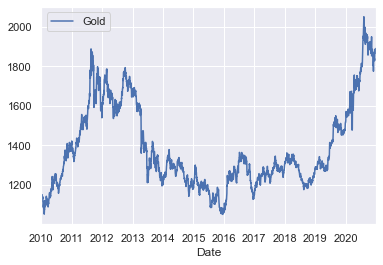

In [79]:
data.plot()

In [80]:
from statsmodels.tsa.stattools import adfuller

In [81]:
test_result=adfuller(data['Gold'])

In [82]:
def adfuller_test(Gold):
    result=adfuller(Gold)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data['Gold'])


ADF Test Statistic : -0.9920779683844156
p-value : 0.7561427026306997
#Lags Used : 6
Number of Observations : 2863
weak evidence against null hypothesis,indicating it is non-stationary 


In [83]:
data['First Difference'] = data['Gold'] - data['Gold'].shift(1)
data['Seasonal First Difference']=data['Gold']-data['Gold'].shift(12)
print(data)


              Gold  First Difference  Seasonal First Difference
Date                                                           
2010-01-01  1117.7               NaN                        NaN
2010-01-04  1117.7               0.0                        NaN
2010-01-05  1118.1               0.4                        NaN
2010-01-06  1135.9              17.8                        NaN
2010-01-07  1133.1              -2.8                        NaN
2010-01-08  1138.2               5.1                        NaN
2010-01-11  1150.7              12.5                        NaN
2010-01-12  1128.9             -21.8                        NaN
2010-01-13  1136.4               7.5                        NaN
2010-01-14  1142.6               6.2                        NaN
2010-01-15  1130.1             -12.5                        NaN
2010-01-18  1130.1               0.0                        NaN
2010-01-19  1139.7               9.6                       22.0
2010-01-20  1112.3             -27.4    

In [84]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -8.805051375241025
p-value : 2.0625907707022024e-14
#Lags Used : 25
Number of Observations : 2832
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<AxesSubplot:xlabel='Date'>

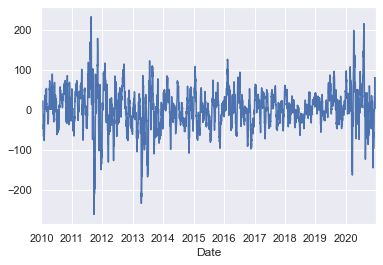

In [85]:
data['Seasonal First Difference'].plot()

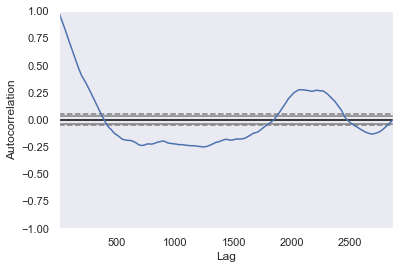

In [86]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data['Gold'])
plt.show()

In [87]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

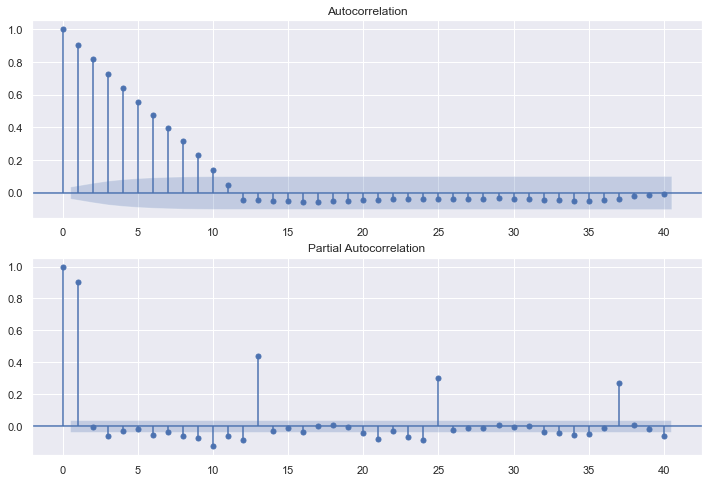

In [88]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(data['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(data['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [89]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Gold'],order=(2,1,10))
model_fit=model.fit()
model_fit.summary()

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No fre

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Gold   No. Observations:                 2869
Model:                ARIMA(2, 1, 10)   Log Likelihood              -11790.638
Method:                       css-mle   S.D. of innovations             14.742
Date:                Sat, 20 Feb 2021   AIC                          23609.277
Time:                        13:02:33   BIC                          23692.741
Sample:                    01-04-2010   HQIC                         23639.367
                         - 12-31-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2687      0.257      1.047      0.295      -0.234       0.772
ar.L1.D.Gold     -0.6195      0.778     -0.796      0.426      -2.144       0.905
ar.L2.D.Gold      0.2056      0.576      0.357      0.721      -0.923       1.335
ma.L1.D.Gold      0.5923      0.778      0.762      0.446      -0.932       2.117
ma.L2.D.Gold     -0.2135      0.556     -0.384      0.701      -1.304       0.877
ma.L3.D.Gold      0.0115      0.024      0.476      0.634      -0.036       0.059
ma.L4.D.Gold     -0.0460      0.022     -2.048      0.041      -0.090      -0.002
ma.L5.D.Gold     -0.0349      0.041     -0.855      0.393      -0.115       0.045
ma.L6.D.Gold     -0.0423      0.039     -1.092      0.275      -0.118       0.034
ma.L7.D.Gold     -0.0226      0.047     -0.486      0.627      -0.114       0.069
ma.L8.D.Gold      0.0148      0.033      0.452      0.651      -0.049       0.079
ma.L9.D.Gold      0.0383      0.024      1.595      0.111      -0.009       0.085
ma.L10.D.Gold     0.0213      0.032      0.666      0.505      -0.041       0.084
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.1643           +0.0000j            1.1643            0.5000
AR.2             4.1768           +0.0000j            4.1768            0.0000
MA.1             1.3579           -0.3917j            1.4132           -0.0447
MA.2             1.3579           +0.3917j            1.4132            0.0447
MA.3             0.6872           -1.2179j            1.3984           -0.1682
MA.4             0.6872           +1.2179j            1.3984            0.1682
MA.5            -0.3002           -1.5008j            1.5306           -0.2814
MA.6            -0.3002           +1.5008j            1.5306            0.2814
MA.7            -1.1239           -0.0000j            1.1239           -0.5000
MA.8            -1.2450           -1.0863j            1.6523           -0.3858
MA.9            -1.2450           +1.0863j            1.6523            0.3858
MA.10           -1.6756           -0.0000j            1.6756           -0.5000
------------------------------------------------------------------------------
"""

In [91]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Gold'],order=(2,1,10),seasonal_order=(2,1,10,12))
results=model.fit()

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Date'>

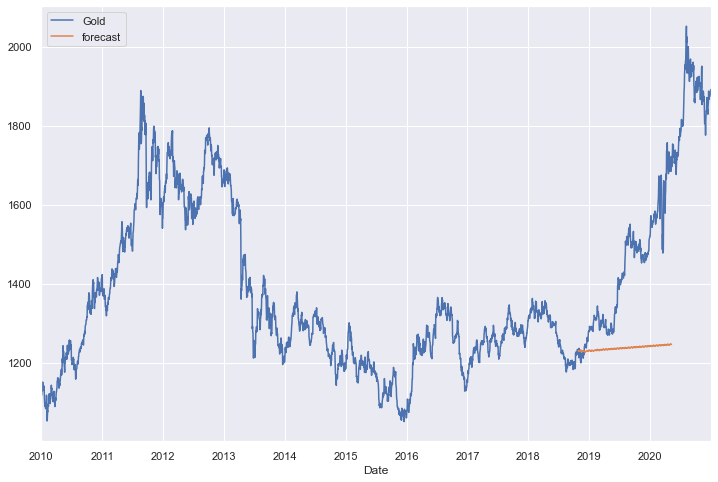

In [92]:
data['forecast']=results.predict(start=2300,end=2700,dynamic=True)
data[['Gold','forecast']].plot(figsize=(12,8))

In [93]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Gold'],order=(1,1,10))
model_fit=model.fit()
model_fit.summary()

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No fre

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Gold   No. Observations:                 2869
Model:                ARIMA(1, 1, 10)   Log Likelihood              -11790.988
Method:                       css-mle   S.D. of innovations             14.744
Date:                Sat, 20 Feb 2021   AIC                          23607.977
Time:                        13:26:23   BIC                          23685.479
Sample:                    01-04-2010   HQIC                         23635.917
                         - 12-31-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2687      0.255      1.052      0.293      -0.232       0.769
ar.L1.D.Gold     -0.0880        nan        nan        nan         nan         nan
ma.L1.D.Gold      0.0605        nan        nan        nan         nan         nan
ma.L2.D.Gold      0.0068        nan        nan        nan         nan         nan
ma.L3.D.Gold      0.0009        nan        nan        nan         nan         nan
ma.L4.D.Gold     -0.0446      0.019     -2.392      0.017      -0.081      -0.008
ma.L5.D.Gold     -0.0107        nan        nan        nan         nan         nan
ma.L6.D.Gold     -0.0485        nan        nan        nan         nan         nan
ma.L7.D.Gold      0.0017        nan        nan        nan         nan         nan
ma.L8.D.Gold      0.0017        nan        nan        nan         nan         nan
ma.L9.D.Gold      0.0387      0.016      2.401      0.016       0.007       0.070
ma.L10.D.Gold     0.0029        nan        nan        nan         nan         nan
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1           -11.3628           +0.0000j           11.3628            0.5000
MA.1             1.3907           -0.4103j            1.4500           -0.0457
MA.2             1.3907           +0.4103j            1.4500            0.0457
MA.3             0.6581           -1.2175j            1.3840           -0.1711
MA.4             0.6581           +1.2175j            1.3840            0.1711
MA.5            -0.2875           -1.4310j            1.4596           -0.2816
MA.6            -0.2875           +1.4310j            1.4596            0.2816
MA.7            -1.3544           -0.0000j            1.3544           -0.5000
MA.8            -1.1016           -1.0090j            1.4939           -0.3820
MA.9            -1.1016           +1.0090j            1.4939            0.3820
MA.10          -13.3252           -0.0000j           13.3252           -0.5000
------------------------------------------------------------------------------
"""

In [94]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Gold'],order=(2,1,10),seasonal_order=(1,1,10,12))
results=model.fit()

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  warnings.warn('No frequency information was'
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood

<AxesSubplot:xlabel='Date'>

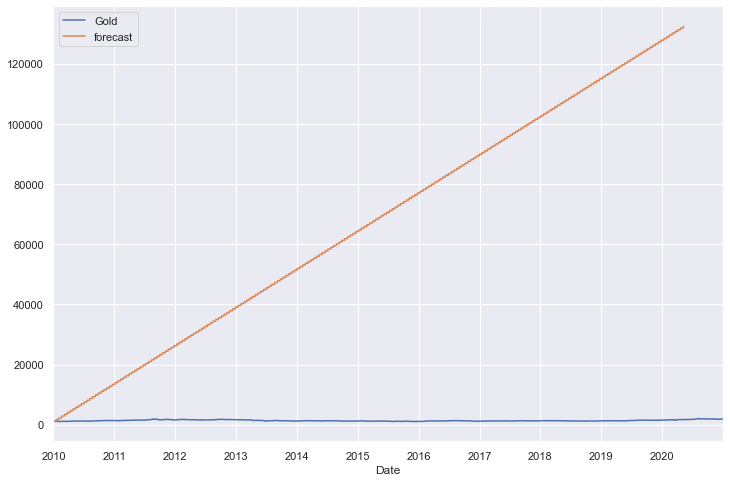

In [96]:
data['forecast']=results.predict(start=10,end=2700,dynamic=True)
data[['Gold','forecast']].plot(figsize=(12,8))

In [97]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data['Gold'],order=(1,1,10))
model_fit=model.fit()
model_fit.summary()

/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No fre

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Gold   No. Observations:                 2869
Model:                ARIMA(1, 1, 10)   Log Likelihood              -11790.988
Method:                       css-mle   S.D. of innovations             14.744
Date:                Sat, 20 Feb 2021   AIC                          23607.977
Time:                        14:03:17   BIC                          23685.479
Sample:                    01-04-2010   HQIC                         23635.917
                         - 12-31-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2687      0.255      1.052      0.293      -0.232       0.769
ar.L1.D.Gold     -0.0880        nan        nan        nan         nan         nan
ma.L1.D.Gold      0.0605        nan        nan        nan         nan         nan
ma.L2.D.Gold      0.0068        nan        nan        nan         nan         nan
ma.L3.D.Gold      0.0009        nan        nan        nan         nan         nan
ma.L4.D.Gold     -0.0446      0.019     -2.392      0.017      -0.081      -0.008
ma.L5.D.Gold     -0.0107        nan        nan        nan         nan         nan
ma.L6.D.Gold     -0.0485        nan        nan        nan         nan         nan
ma.L7.D.Gold      0.0017        nan        nan        nan         nan         nan
ma.L8.D.Gold      0.0017        nan        nan        nan         nan         nan
ma.L9.D.Gold      0.0387      0.016      2.401      0.016       0.007       0.070
ma.L10.D.Gold     0.0029        nan        nan        nan         nan         nan
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1           -11.3628           +0.0000j           11.3628            0.5000
MA.1             1.3907           -0.4103j            1.4500           -0.0457
MA.2             1.3907           +0.4103j            1.4500            0.0457
MA.3             0.6581           -1.2175j            1.3840           -0.1711
MA.4             0.6581           +1.2175j            1.3840            0.1711
MA.5            -0.2875           -1.4310j            1.4596           -0.2816
MA.6            -0.2875           +1.4310j            1.4596            0.2816
MA.7            -1.3544           -0.0000j            1.3544           -0.5000
MA.8            -1.1016           -1.0090j            1.4939           -0.3820
MA.9            -1.1016           +1.0090j            1.4939            0.3820
MA.10          -13.3252           -0.0000j           13.3252           -0.5000
------------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

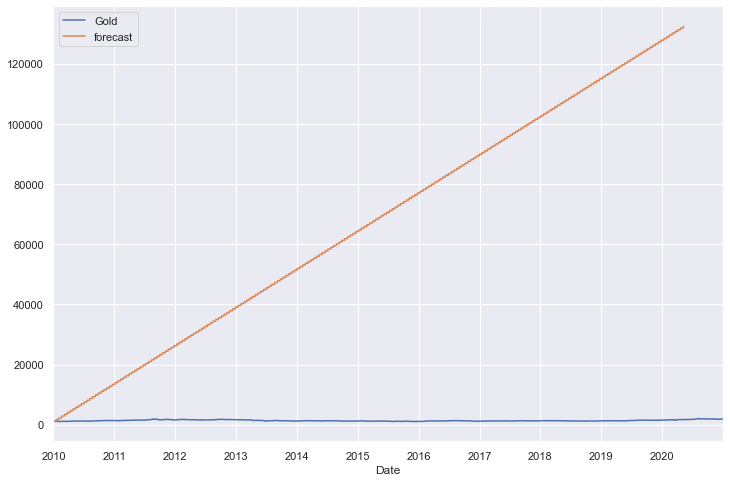

In [98]:
data['forecast']=results.predict(start=10,end=2700,dynamic=True)
data[['Gold','forecast']].plot(figsize=(12,8))